<a href="https://colab.research.google.com/github/CharlyPierce/AlgebraLineal/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
A=[]
for i in range(7):
  A.append([i,i])
  A.append([i+1,i])
A

[[0, 0],
 [1, 0],
 [1, 1],
 [2, 1],
 [2, 2],
 [3, 2],
 [3, 3],
 [4, 3],
 [4, 4],
 [5, 4],
 [5, 5],
 [6, 5],
 [6, 6],
 [7, 6]]

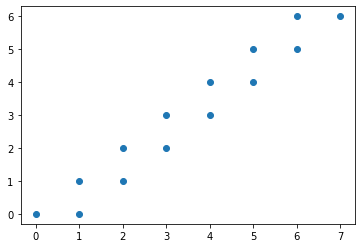

In [ ]:
plt.scatter(np.array(A)[:,0].reshape(1,-1),np.array(A)[:,1].reshape(1,-1))

In [ ]:
A1=(np.matrix(A).T*np.matrix(A))/14#Calculamos sigma multiplicando A'*A/m donde A' es A transpuesta y m el No de datos
A1

matrix([[16.5, 14.5],
        [14.5, 13. ]])

In [ ]:
np.linalg.eig(A1)#Calculamos valores propios y vectores propios
#Nos damos cuenta que el primer valor propio es mayor que el segundo
#por lo que es mucho más significativo el primer valor propio

(array([29.35522167,  0.14477833]), matrix([[ 0.74827139, -0.66339273],
         [ 0.66339273,  0.74827139]]))

In [ ]:
u1=np.linalg.eig(A1)[1].T[0]#eigenvalue->29.35522167#calculamos los vectores propios u1
u2=np.linalg.eig(A1)[1].T[1]#eigenvalue->0.1447783  #calculamos los vectores propios u2
u1,u2#Debido a que el primer vlor propio es mayor u1 que es el primer vector...
#propio es mucho más significativo

(matrix([[0.74827139, 0.66339273]]), matrix([[-0.66339273,  0.74827139]]))

In [ ]:
A[2],0.74827139+0.66339273,-0.66339273+0.7482277139
#Seleccionamos un punto, al ser 1,1 y multiplicar por el vector propio 
#será solo la suma del vector propio.

([1, 1], 1.41166412, 0.0848349839)

In [ ]:
#Cada multiplicacion de el dato "A[2]" por cada vector propio nos dara un alfa diferente,
#Cada dato puede representarse como la combinacion lineal de el alpha por la base
#A[i]=x_i = alpha_1 U1 + alpha2_2 U2
#A[i]=x_i ≈ alpha_1 U1 
alpha_1=A[2]*u1.reshape(2,-1)
alpha_2=A[2]*u2.reshape(2,-1)
alpha_1,alpha_2

(matrix([[1.41166413]]), matrix([[0.08487866]]))

In [ ]:
#A[i]=x_i = alpha_1 U1 + alpha2_2 U2
#A[i]=x_i ≈ alpha_1 U1 

In [ ]:
#El dato exacto es representado como combinacion linel de la base por el alpha
#si eliminamos un vector propio sera solo una aproximacion
alpha_1*u1+alpha_2*u2

matrix([[1., 1.]])

In [ ]:
alpha_1*u1,alpha_2*u2##u1 eigenvenctor asociado al eigenvalue->29.35522167
                      #u2 eigenvenctor asociado al eigenvalue->0.1447783
#El primer valor debe ser más cercano al dato "A[2]" al tener un valor propio más grande

(matrix([[1.05630789, 0.93648773]]), matrix([[-0.05630789,  0.06351227]]))

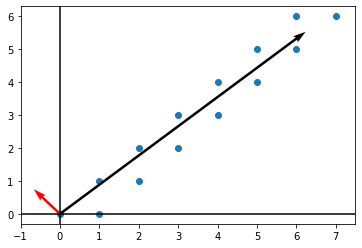

In [ ]:
plt.scatter(np.array(A)[:,0].reshape(1,-1),np.array(A)[:,1].reshape(1,-1))
plt.axhline(0, color='black')#Pintar los ejes de color
plt.axvline(0, color='black')
# plt.xlim([min(-1,1), max(-1,1)])
# plt.ylim([min(-1,1), max(-1,1)])
plt.xlim(-1,7.5)
plt.quiver([np.squeeze(np.array(u1))[0]], [np.squeeze(np.array(u1))[1]], angles='xy', scale_units='xy', scale=0.12)#pintar vetor propio
plt.quiver([np.squeeze(np.array(u2))[0]], [np.squeeze(np.array(u2))[1]], angles='xy', scale_units='xy', scale=1,color='red')
#El vector propio No 2 no tiene mucha varianza por lo que se puede eliminar

In [ ]:
A[2]*u2.reshape(2,-1)

matrix([[0.08487866]])

In [ ]:
A[2]

[1, 1]

In [ ]:
ev=np.linalg.eig(A1)[1]#matriz de eigenvectores
v1=np.linalg.inv(ev).dot([1,0])
v2=np.linalg.inv(ev).dot([0,1])
M=np.concatenate((v1,v2))#No la usamos porq los vectores u1,u2 estan en coordenadas de x,y
M_in=np.linalg.inv(M)
M_in#Esta matriz sirve para ir de un punto en base B a canonica

matrix([[ 0.74827139,  0.66339273],
        [-0.66339273,  0.74827139]])

In [ ]:
# alpha_1=A[2]*u1.reshape(2,-1)
# alpha_2=A[2]*u2.reshape(2,-1)
A[2]

[1, 1]

In [ ]:
(A[2]*u2.reshape(2,-1))*u2

matrix([[-0.05630789,  0.06351227]])

In [ ]:
u1

matrix([[0.74827139, 0.66339273]])

In [ ]:
p11=np.array(alpha_1*u1).squeeze()#Proyeccion del punto A[2] sobre u1, con coordenadas normales
p12=np.array(alpha_2*u2).squeeze()#Proyeccion del punto A[2] sobre u2, con coordenadas normales
p11,p12

(array([1.05630789, 0.93648773]), array([-0.05630789,  0.06351227]))

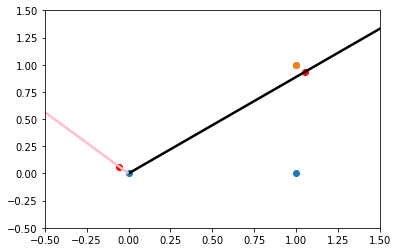

In [ ]:
plt.scatter(np.array(A)[:,0].reshape(1,-1),np.array(A)[:,1].reshape(1,-1))
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.scatter(1,1)
plt.scatter(p11[0],p11[1],c='red',)#Proyeccion del punto A[2] sobre u1, con coordenadas normales
plt.scatter(p12[0],p12[1],c='red',)#Proyeccion del punto A[2] sobre u2, con coordenadas normales
plt.quiver([np.squeeze(np.array(u1))[0]], [np.squeeze(np.array(u1))[1]], angles='xy', scale_units='xy', scale=0.12)#pintar vetor propio
plt.quiver([np.squeeze(np.array(u2))[0]], [np.squeeze(np.array(u2))[1]], angles='xy', scale_units='xy', scale=0.5,color='pink')
#El vector propio No 2 no tiene mucha varianza por lo que se puede eliminar

In [ ]:
len(A)

14

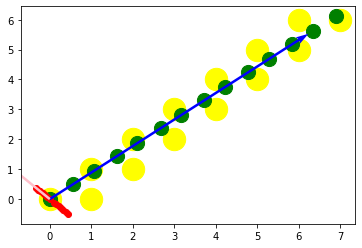

In [ ]:
def es():
  #A[i]=x_i = alpha_1 U1 + alpha2_2 U2
  #A[i]=x_i ≈ alpha_1 U1
  plt.scatter(np.array(A)[:,0].reshape(1,-1),np.array(A)[:,1].reshape(1,-1),color='yellow',s=500)
  for i in range(len(A)):
    alpha_1=A[i]*u1.reshape(2,-1)
    alpha_2=A[i]*u2.reshape(2,-1)
    p11=np.array(alpha_1*u1).squeeze()#Proyeccion del punto A[2] sobre u1, con coordenadas normales
    p12=np.array(alpha_2*u2).squeeze()#Proyeccion del punto A[2] sobre u2, con coordenadas normales
    # plt.xlim(-0.5,1.5)
    # plt.ylim(-0.5,1.5)
    plt.scatter(p11[0],p11[1],c='green',s=200)#Proyeccion del punto A[2] sobre u1, con coordenadas normales
    plt.scatter(p12[0],p12[1],c='red',)#Proyeccion del punto A[2] sobre u2, con coordenadas normales
  # plt.scatter(np.array(A)[:,0].reshape(1,-1),np.array(A)[:,1].reshape(1,-1),color='yellow',s=500)
  plt.quiver([np.squeeze(np.array(u1))[0]], [np.squeeze(np.array(u1))[1]], angles='xy', scale_units='xy', scale=0.12,color='blue')#pintar vetor propio
  plt.quiver([np.squeeze(np.array(u2))[0]], [np.squeeze(np.array(u2))[1]], angles='xy', scale_units='xy', scale=0.5,color='pink')
es()

In [ ]:
np.linalg.eig(A1)[1]*np.linalg.eig(A1)[1].T#Matriz identidad

matrix([[ 1.00000000e+00, -1.20987025e-17],
        [-1.20987025e-17,  1.00000000e+00]])

In [ ]:
np.linalg.eig(A1)[1].T*np.linalg.eig(A1)[1]#Matriz identidad

matrix([[1.00000000e+00, 1.20987025e-17],
        [1.20987025e-17, 1.00000000e+00]])

In [ ]:
np.linalg.eig(A1)[1]

matrix([[ 0.74827139, -0.66339273],
        [ 0.66339273,  0.74827139]])

In [ ]:
MVP=np.linalg.eig(A1)[0]*np.identity(2)#Matriz de valores propios
#np.linalg.eig(A1)[0]->valores propios [a,b]*I_2x2 
MVP#Matriz de valores propios

array([[29.35522167,  0.        ],
       [ 0.        ,  0.14477833]])

In [ ]:
V=np.linalg.eig(A1)[1]#Matriz de vectoresespropios
L=MVP**(1/2)#Matriz de valores propios con raiz
L#Matiz Diagonal->ya es L^(1/2) Lo agregamos arriba
#Entonces obtén S, la estructura factorial, usando S =V L^(1/2)
#V es la matiz de valores propios  np.linalg.eig(A1)[1]

array([[5.41804593, 0.        ],
       [0.        , 0.38049748]])

In [ ]:
np.linalg.eig(A1)[0]

array([29.35522167,  0.14477833])

In [ ]:
V*L#Entonces, por ejemplo, 3.59 es la correlación entre la segunda variable y el primer componente principal.

matrix([[ 4.05416878, -0.25241926],
        [ 3.5942923 ,  0.28471538]])

In [ ]:
#Si tuvieras matris de 3x3 ->Tendrias 3 vectores propios
#prodrias tomar solo 2 vectores propios, multiplicar la matriz 3x2 que producen por
#Su transpuesta 2x3 dandote una matriz 3x3, la diagonal es la importante ya que dice lo siguiente
#Para el primer valor de la diagonal esta entre 0<=1 el primer valor de la diag dice cuanto porcentaje explican los 2
#Vectores propios que tomaste de la primer variable "CAracteristica"
#El segundo valor de la diagonal te dice el porcentaje que explican los vectores propios con respecto
#A la segunda variable "caracteristica-> Feture"
#El Tercer valor de la diagonal te dice el procentaje que explican los 2 vectores propios que tomaste
#con respecto a la tercer variable "caracteristica-> Feature"

matrix([[1.]])